# King County Housing Data: Multiple Linear Regression Project

Laura Miller

Full time  

## Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Quality of view from house
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [3]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Scrub data

Initial observations
- Date is dtype string
- Sqft_basement is dtype object
- yr_renovated is float
- Waterfront contains missing values
- yr_renovated contains missing values
- view contains missing values


### Examine date column

In [4]:
import datetime as dt
df['month'] = pd.to_datetime(df['date']).dt.month
df['yr_sold'] = pd.to_datetime(df['date']).dt.year
#df['date'] = pd.to_datetime(df['date']).map(dt.datetime.toordinal)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [6]:
df.date.value_counts()

6/23/2014    142
6/26/2014    131
6/25/2014    131
7/8/2014     127
4/27/2015    126
            ... 
5/24/2015      1
5/27/2015      1
7/27/2014      1
8/3/2014       1
8/30/2014      1
Name: date, Length: 372, dtype: int64

In [7]:
df.date.describe()

count         21597
unique          372
top       6/23/2014
freq            142
Name: date, dtype: object

<AxesSubplot:xlabel='date', ylabel='price'>

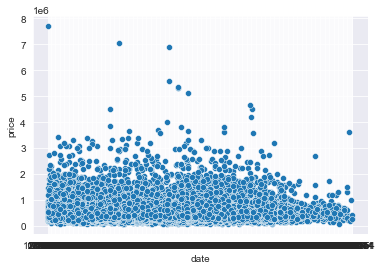

In [8]:
sns.scatterplot('date', 'price', data=df)

<AxesSubplot:xlabel='yr_sold', ylabel='price'>

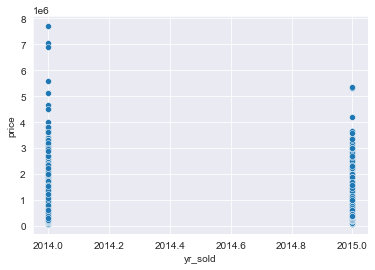

In [9]:
sns.scatterplot('yr_sold', 'price', data=df)

Price by yr_sold does not look too interesting (perhaps a slight negative trend), as there are only 2 years on record. yr_sold can be used in calculations to create new features.

<AxesSubplot:xlabel='month', ylabel='count'>

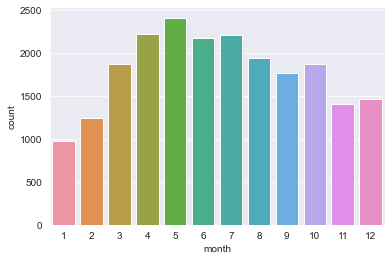

In [10]:
sns.countplot('month', data=df)

In [11]:
month_counts = df.month.value_counts().sort_index()

In [12]:
type(month_counts)

pandas.core.series.Series

In [13]:
months = list(month_counts.reset_index().iloc[:, 0])
counts = list(month_counts.reset_index().iloc[:, 1])

In [14]:
counts

[978, 1247, 1875, 2229, 2414, 2178, 2211, 1939, 1771, 1876, 1409, 1470]

In [15]:
sorted_counts = sorted(counts, reverse=True)
sorted_counts

[2414, 2229, 2211, 2178, 1939, 1876, 1875, 1771, 1470, 1409, 1247, 978]

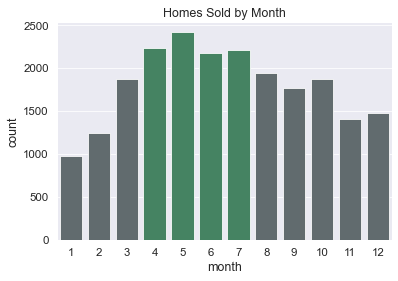

In [16]:
sns.set_context('paper', font_scale = 1.3)

top_values = sorted_counts[:4]
clrs = ['#3b8d61' if (x in top_values) else '#5f6c70' for x in counts]
ax = sns.barplot(x=months, y=counts, palette=clrs)
ax.set_title('Homes Sold by Month')
ax.set_xlabel('month')
ax.set_ylabel('count')
plt.savefig('images/count-month.png')
plt.savefig('images/hr-count-month.png', dpi=200);

There are certain months where more houses are sold (late spring to early summer). Are there certain months where houses sell for more?

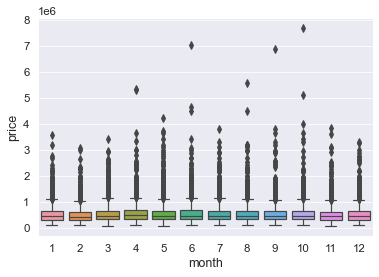

In [17]:
sns.boxplot('month', 'price', data=df, showfliers=True);

There are lots of outliers for each month. Let's look at the mean price for each month as well as the median price. Median may be more reflective of the data for each month, as the data is right-skewed

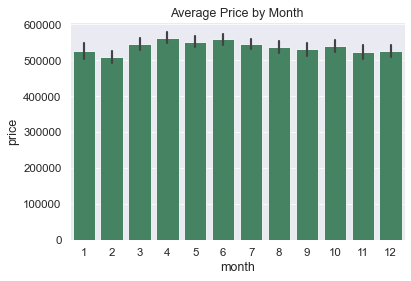

In [18]:
# Mean price
ax = sns.barplot('month', 'price', data=df, color='#3b8d61')
ax.set_title('Average Price by Month');

<AxesSubplot:xlabel='month', ylabel='price'>

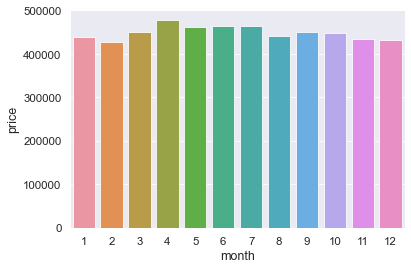

In [19]:
# Median price
sns.barplot('month', 'price', data = df.groupby('month').median().reset_index())

There aren't any months where homes seem to sell for significantly more

In [20]:
df.groupby('month').median()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold
month,,,,,,,,,,,,,,,,,,,,
1,3.905036e+09,438500.0,3.0,2.25,1890.0,7800.0,1.0,0.0,0.0,3.0,7.0,1570.0,1974.0,0.0,98065.0,47.55950,-122.2310,1800.0,7700.0,2015.0
2,3.997500e+09,426500.0,3.0,2.00,1830.0,7667.0,1.0,0.0,0.0,3.0,7.0,1489.0,1974.0,0.0,98059.0,47.56120,-122.2290,1800.0,7638.0,2015.0
3,3.905040e+09,450000.0,3.0,2.25,1870.0,7560.0,1.0,0.0,0.0,3.0,7.0,1540.0,1973.0,0.0,98065.0,47.56480,-122.2260,1820.0,7647.0,2015.0
4,4.022900e+09,477000.0,3.0,2.25,1900.0,7500.0,1.5,0.0,0.0,3.0,7.0,1540.0,1976.0,0.0,98072.0,47.56860,-122.2290,1840.0,7560.0,2015.0
5,3.905005e+09,462000.0,3.0,2.25,1930.0,7498.0,1.0,0.0,0.0,3.0,7.0,1540.0,1974.0,0.0,98072.0,47.57870,-122.2365,1840.0,7551.5,2014.0
6,3.904925e+09,465000.0,3.0,2.25,1980.0,7700.0,1.5,0.0,0.0,3.0,8.0,1600.0,1975.0,0.0,98072.0,47.57605,-122.2290,1890.0,7720.0,2014.0
7,3.885801e+09,465000.0,3.0,2.25,1950.0,7695.0,1.5,0.0,0.0,3.0,8.0,1610.0,1977.0,0.0,98059.0,47.57400,-122.2150,1870.0,7650.0,2014.0
8,4.016800e+09,442200.0,3.0,2.25,1940.0,7810.0,1.0,0.0,0.0,3.0,7.0,1590.0,1976.0,0.0,98059.0,47.57720,-122.2220,1860.0,7755.0,2014.0
9,3.826501e+09,450000.0,3.0,2.25,1920.0,7620.0,1.5,0.0,0.0,3.0,7.0,1580.0,1974.0,0.0,98065.0,47.57400,-122.2350,1830.0,7503.0,2014.0


You could potentially get 30K - 40K more for a house by waiting to sell during April - July.

#### Missing values in waterfront

In [21]:
df.waterfront.value_counts(normalize=True)

0.0    0.992404
1.0    0.007596
Name: waterfront, dtype: float64

In [22]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
month               0
yr_sold             0
dtype: int64

Under 1% of houses have a waterfront. Most do not. There are 2376 missing values

<AxesSubplot:xlabel='long', ylabel='lat'>

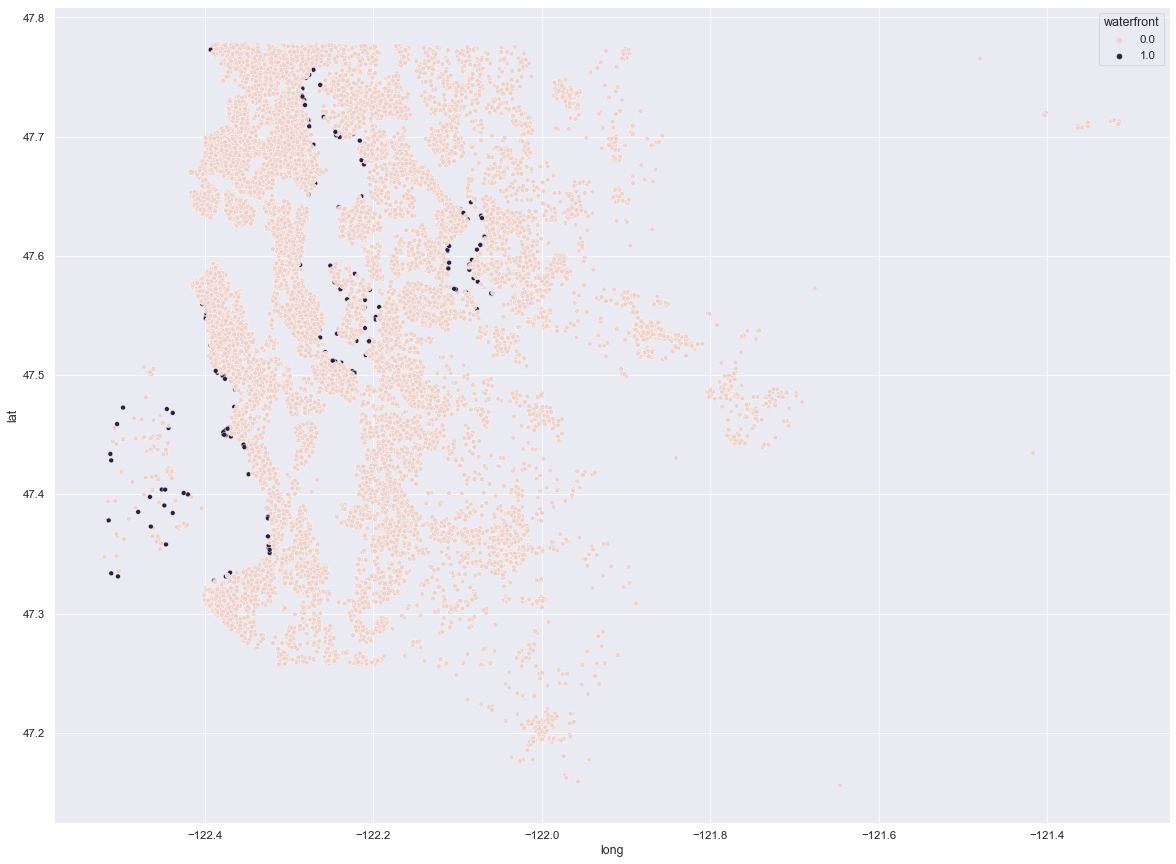

In [23]:
plt.figure(figsize=(20, 15))
sns.scatterplot(x = "long", y = "lat", hue = "waterfront",  data = df)

<AxesSubplot:xlabel='waterfront', ylabel='price'>

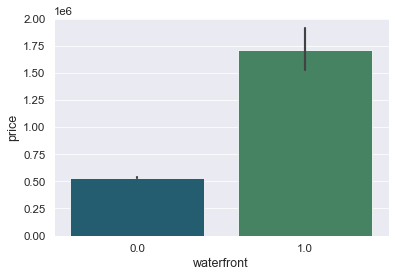

In [24]:
clrs = ['#18637b', '#3b8d61']
sns.barplot('waterfront', 'price', data=df, palette=clrs)

In [25]:
from matplotlib import ticker

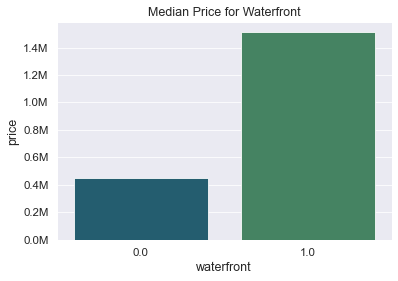

In [26]:
clrs = ['#18637b', '#3b8d61']
ax = sns.barplot('waterfront', 'price', data = df.groupby('waterfront').median().reset_index(), palette=clrs)
ax.set_title('Median Price for Waterfront')

ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/1000000) + 'M'))

<AxesSubplot:xlabel='waterfront', ylabel='price'>

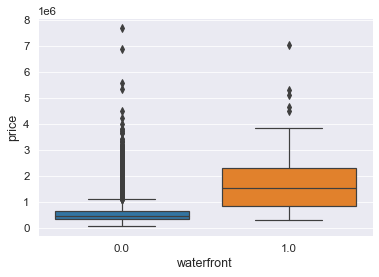

In [27]:
sns.boxplot('waterfront', 'price', data=df)

In [28]:
np.random.seed(123)
s = df.waterfront.value_counts(normalize=True)
missing = df.waterfront.isnull()
df.loc[missing, 'waterfront'] = np.random.choice(s.index, size=len(df[missing]), p=s.values)

In [29]:
df.waterfront.isnull().sum()

0

In [30]:
df.waterfront.value_counts(normalize=True)

0.0    0.992221
1.0    0.007779
Name: waterfront, dtype: float64

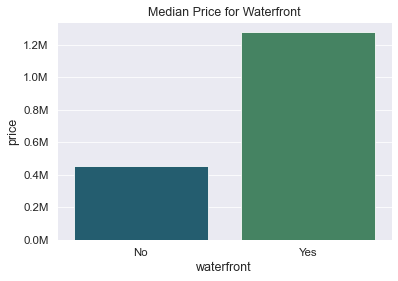

In [31]:
clrs = ['#18637b', '#3b8d61']
ax = sns.barplot('waterfront', 'price', data = df.groupby('waterfront').median().reset_index(), palette=clrs)
ax.set_title('Median Price for Waterfront')

ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/1000000) + 'M'))
ax.set_xticklabels(['No', 'Yes'])
plt.savefig('images/waterfront.png')
plt.savefig('images/hr-waterfront.png', dpi=200)

<AxesSubplot:xlabel='long', ylabel='lat'>

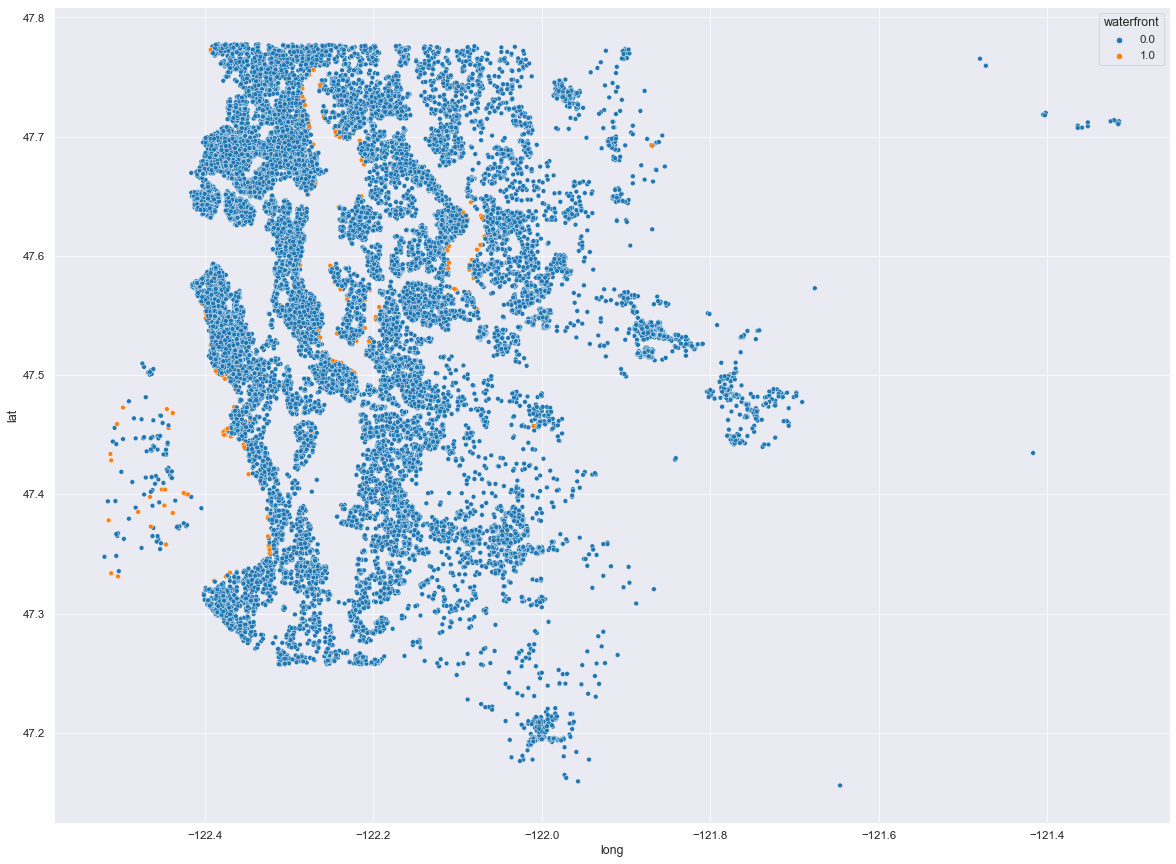

In [32]:
plt.figure(figsize=(20, 15))
sns.scatterplot(x = "long", y = "lat", hue = "waterfront",  data = df)

The reassigned values look pretty good. Most of the orange points lie on the waterfront. 

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

### sqft_basement

In [34]:
df.sqft_basement.value_counts(normalize=True)

0.0       0.593879
?         0.021021
600.0     0.010048
500.0     0.009677
700.0     0.009631
            ...   
2850.0    0.000046
2610.0    0.000046
2310.0    0.000046
1960.0    0.000046
2190.0    0.000046
Name: sqft_basement, Length: 304, dtype: float64

'?' appears to be a placeholder value. The majority of homes (over half) do not have a basement. For the missing data, I will assume that these homes have no basement or the basements are unfinished/unuseable. 0.0 also happens to be the median value.

In [35]:
df.sqft_basement.replace('?', np.nan, inplace=True)
df.sqft_basement.fillna(0.0, inplace=True)
df.sqft_basement = df.sqft_basement.astype(float)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  float64
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [37]:
df.sqft_basement.value_counts(normalize=True)

0.0       0.614900
600.0     0.010048
500.0     0.009677
700.0     0.009631
800.0     0.009307
            ...   
915.0     0.000046
295.0     0.000046
1281.0    0.000046
2130.0    0.000046
906.0     0.000046
Name: sqft_basement, Length: 303, dtype: float64

#### yr_renovated

In [38]:
df.yr_renovated.value_counts(normalize=True)

0.0       0.958096
2014.0    0.004112
2003.0    0.001746
2013.0    0.001746
2007.0    0.001690
            ...   
1946.0    0.000056
1959.0    0.000056
1971.0    0.000056
1951.0    0.000056
1954.0    0.000056
Name: yr_renovated, Length: 70, dtype: float64

<AxesSubplot:xlabel='yr_renovated', ylabel='price'>

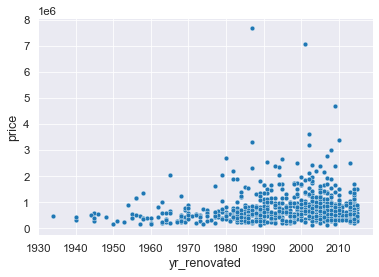

In [39]:
sns.scatterplot('yr_renovated', 'price', data=df[df['yr_renovated'] > 0])

In [40]:
df.yr_renovated.isna().sum()

3842

Lots of missing values. Let's treat these houses as though they were never renovated, filling with the median which is 0.0. I am assuming that renovated houses are likely to have some record of their renovation.

In [41]:
df.yr_renovated.fillna(value=0.0, inplace=True)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  float64
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

<AxesSubplot:xlabel='long', ylabel='lat'>

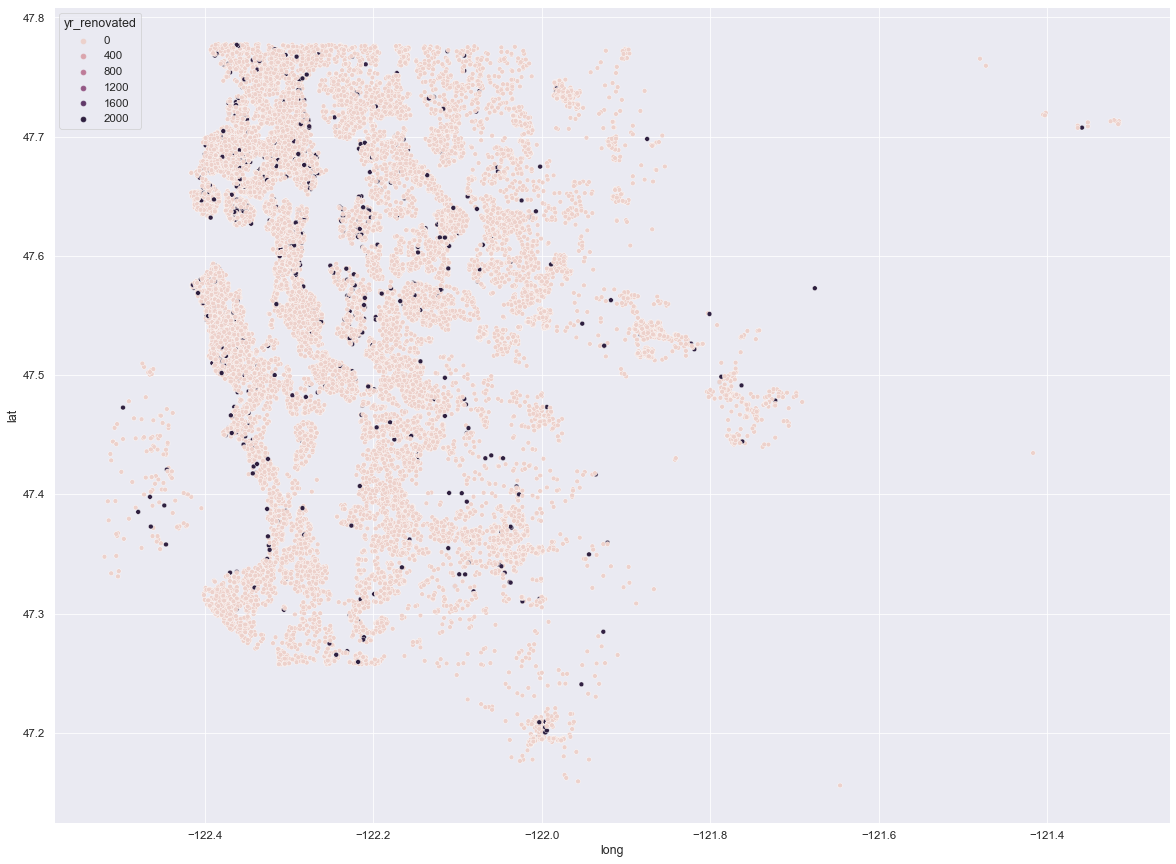

In [43]:
plt.figure(figsize=(20, 15))
sns.scatterplot(x = "long", y = "lat", hue = "yr_renovated",  data = df)

Many of the renovated houses are close to the waterfront, but there are plenty of homes that are not.

In [44]:
df.groupby('yr_renovated').count()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,month,yr_sold
yr_renovated,,,,,,,,,,,,,,,,,,,,,
0.0,20853,20853,20853,20853,20853,20853,20853,20853,20853,20791,...,20853,20853,20853,20853,20853,20853,20853,20853,20853,20853
1934.0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1940.0,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
1944.0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1945.0,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011.0,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
2012.0,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
2013.0,31,31,31,31,31,31,31,31,31,31,...,31,31,31,31,31,31,31,31,31,31


In [45]:
df['yr_renovated'] = df['yr_renovated'].astype(int)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  float64
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

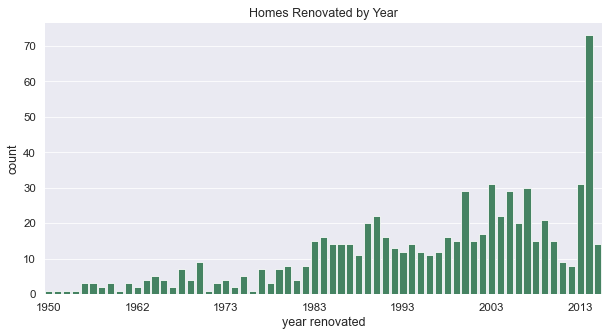

In [47]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x = "yr_renovated", data = df[df['yr_renovated'] >= 1950], color='#3b8d61')
ax.set_xlabel('year renovated')
ax.set_title('Homes Renovated by Year')
#ax.xaxis.set_ticks(np.arange(1950, 2015, 5))
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
#ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
#plt.xticks(rotation=90)
plt.savefig('images/count-yr-renovated.png')
plt.savefig('images/hr-count-yr-renovated.png', dpi=200);

There have been more renovations in more recent years. Might also have to do with the fact that the number of homes in the county have increased over the years. In any case, renovation seems to be key for improving home value in recent years.

#### View

In [48]:
df.view.value_counts(normalize=True)

0.0    0.901923
2.0    0.044441
3.0    0.023591
1.0    0.015325
4.0    0.014721
Name: view, dtype: float64

In [49]:
df.view.isna().sum()

63

<AxesSubplot:xlabel='long', ylabel='lat'>

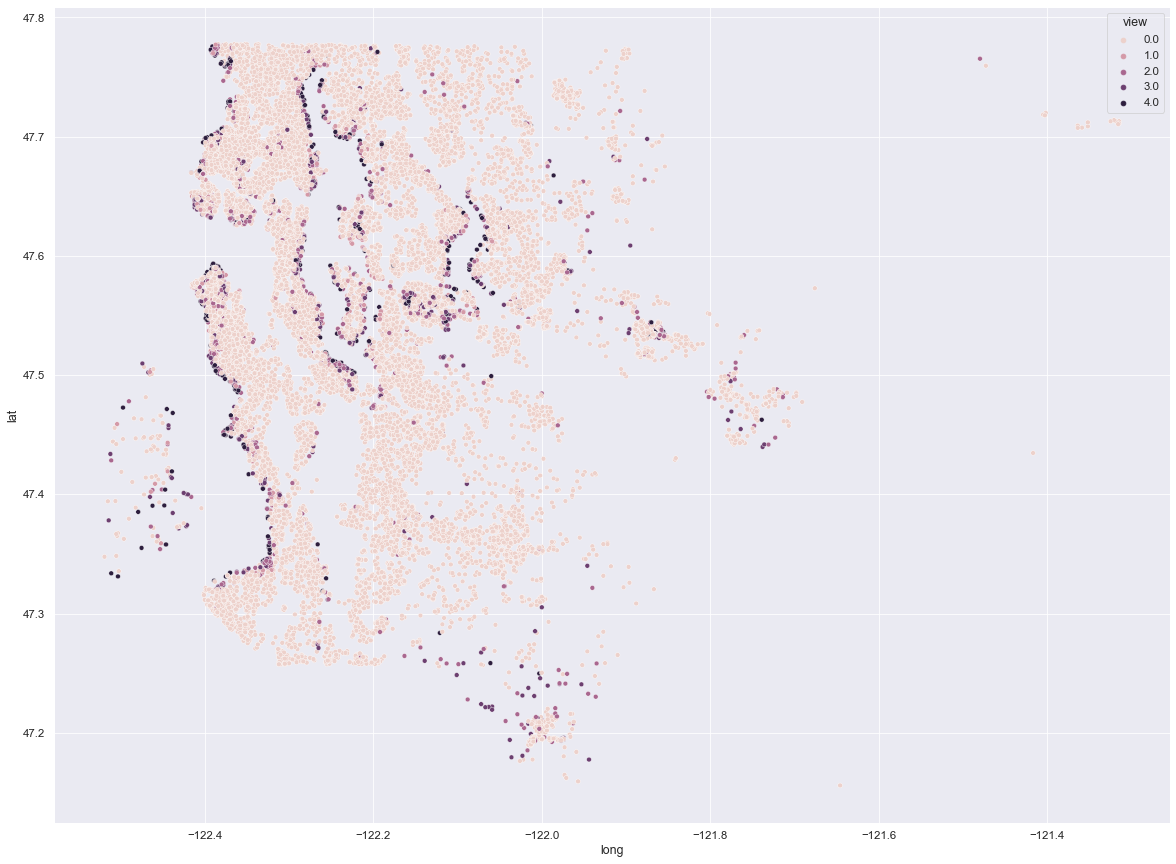

In [50]:
plt.figure(figsize=(20, 15))
sns.scatterplot(x = "long", y = "lat", hue = "view",  data = df)

Many homes with views are also on the waterfront. We can fill in the missing values based on the current distribution of view ratings, or we can just fill them with zero since there aren't that many values. Plus the majority of views are rated at 0.0, which is also the median of the view column.

<AxesSubplot:xlabel='view', ylabel='price'>

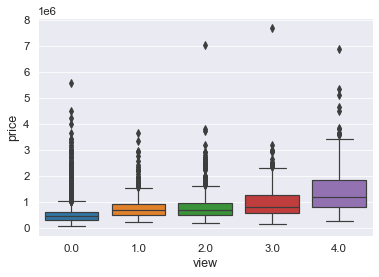

In [51]:
sns.boxplot(x='view', y='price', data=df)

In [52]:
df.view.isna().sum()

63

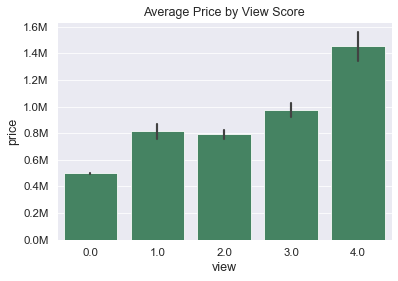

In [53]:
ax = sns.barplot('view', 'price', data=df, color='#3b8d61')
ax.set_title('Average Price by View Score')
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/1000000) + 'M'))
plt.savefig('images/price-view.png')
plt.savefig('images/hr-price-view.png', dpi=200);

Higher median and mean prices for homes with better views. Homes with view scores of 1.0 and 2.0 seem to be comparable in price

In [54]:
df.view.fillna(value=0.0, inplace=True)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  float64
 9   view           21597 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  float64
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

### Check duplicates
id is a unique identifier for a home

In [56]:
df[df.duplicated('id', keep=False)].head(30)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,yr_sold
93,6021501535,7/25/2014,430000.0,3,1.50,1580,5000,1.0,0.0,0.0,...,290.0,1939,0,98117,47.6870,-122.386,1570,4500,7,2014
94,6021501535,12/23/2014,700000.0,3,1.50,1580,5000,1.0,0.0,0.0,...,290.0,1939,0,98117,47.6870,-122.386,1570,4500,12,2014
313,4139480200,6/18/2014,1380000.0,4,3.25,4290,12103,1.0,0.0,3.0,...,1600.0,1997,0,98006,47.5503,-122.102,3860,11244,6,2014
314,4139480200,12/9/2014,1400000.0,4,3.25,4290,12103,1.0,0.0,3.0,...,1600.0,1997,0,98006,47.5503,-122.102,3860,11244,12,2014
324,7520000520,9/5/2014,232000.0,2,1.00,1240,12092,1.0,0.0,0.0,...,280.0,1922,1984,98146,47.4957,-122.352,1820,7460,9,2014
325,7520000520,3/11/2015,240500.0,2,1.00,1240,12092,1.0,0.0,0.0,...,280.0,1922,1984,98146,47.4957,-122.352,1820,7460,3,2015
345,3969300030,7/23/2014,165000.0,4,1.00,1000,7134,1.0,0.0,0.0,...,0.0,1943,0,98178,47.4897,-122.240,1020,7138,7,2014
346,3969300030,12/29/2014,239900.0,4,1.00,1000,7134,1.0,0.0,0.0,...,0.0,1943,0,98178,47.4897,-122.240,1020,7138,12,2014
371,2231500030,10/1/2014,315000.0,4,2.25,2180,10754,1.0,0.0,0.0,...,1080.0,1954,0,98133,47.7711,-122.341,1810,6929,10,2014
372,2231500030,3/24/2015,530000.0,4,2.25,2180,10754,1.0,0.0,0.0,...,1080.0,1954,0,98133,47.7711,-122.341,1810,6929,3,2015


Duplicates indicate a property was sold multiple times. Data looks to be sorted by date (ascending) already, so I don't need to sort values prior to dropping duplicates, keeping the most recent date a home was sold.

In [57]:
df = df.drop_duplicates(['id'], keep='last')

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21420 non-null  int64  
 1   date           21420 non-null  object 
 2   price          21420 non-null  float64
 3   bedrooms       21420 non-null  int64  
 4   bathrooms      21420 non-null  float64
 5   sqft_living    21420 non-null  int64  
 6   sqft_lot       21420 non-null  int64  
 7   floors         21420 non-null  float64
 8   waterfront     21420 non-null  float64
 9   view           21420 non-null  float64
 10  condition      21420 non-null  int64  
 11  grade          21420 non-null  int64  
 12  sqft_above     21420 non-null  int64  
 13  sqft_basement  21420 non-null  float64
 14  yr_built       21420 non-null  int64  
 15  yr_renovated   21420 non-null  int64  
 16  zipcode        21420 non-null  int64  
 17  lat            21420 non-null  float64
 18  long  

### New Features

#### Years since renovation
The difference between year a house was sold and the year it was renovated/ years since renovation at the time a house was sold.

In [59]:
df['yrs_since_reno'] = df['yr_sold'] - df['yr_renovated']

In [60]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,yr_sold,yrs_since_reno
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,1955,0,98178,47.5112,-122.257,1340,5650,10,2014,2014
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014,23
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,1933,0,98028,47.7379,-122.233,2720,8062,2,2015,2015
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1965,0,98136,47.5208,-122.393,1360,5000,12,2014,2014
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1987,0,98074,47.6168,-122.045,1800,7503,2,2015,2015


<AxesSubplot:xlabel='yrs_since_reno', ylabel='price'>

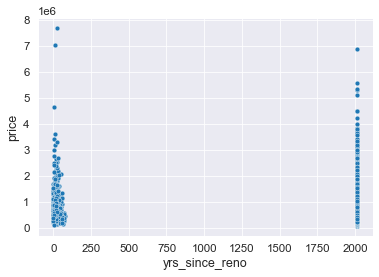

In [61]:
sns.scatterplot("yrs_since_reno", "price", data = df)

Houses that were never renovated have over 2000 values for yrs_since_reno because yr_renovated was equal to 0.0

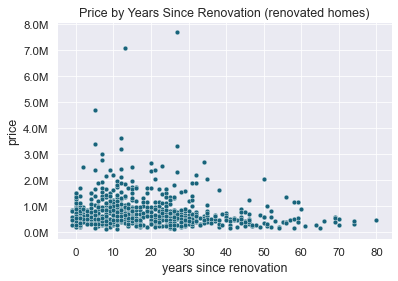

In [62]:
ax = sns.scatterplot("yrs_since_reno", "price", data = df[df['yrs_since_reno'] < 2000], color='#18637b')
ax.set_xlabel('years since renovation')
ax.set_title('Price by Years Since Renovation (renovated homes)')
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/1000000) + 'M'))
plt.savefig('images/price-yrssincereno.png')
plt.savefig('images/hr-price-yrssincereno.png', dpi=200);

Homes with fewer years between their sale date and their last renovation tend to sell for more.

<AxesSubplot:xlabel='yr_renovated', ylabel='price'>

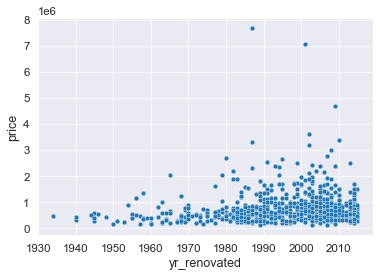

In [63]:
sns.scatterplot("yr_renovated", "price", data = df[df['yr_renovated'] > 0])

#### Bed-bath ratio

In [64]:
df['bed_bath_ratio'] = df['bedrooms']/df['bathrooms']

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              21420 non-null  int64  
 1   date            21420 non-null  object 
 2   price           21420 non-null  float64
 3   bedrooms        21420 non-null  int64  
 4   bathrooms       21420 non-null  float64
 5   sqft_living     21420 non-null  int64  
 6   sqft_lot        21420 non-null  int64  
 7   floors          21420 non-null  float64
 8   waterfront      21420 non-null  float64
 9   view            21420 non-null  float64
 10  condition       21420 non-null  int64  
 11  grade           21420 non-null  int64  
 12  sqft_above      21420 non-null  int64  
 13  sqft_basement   21420 non-null  float64
 14  yr_built        21420 non-null  int64  
 15  yr_renovated    21420 non-null  int64  
 16  zipcode         21420 non-null  int64  
 17  lat             21420 non-null 

<AxesSubplot:xlabel='bed_bath_ratio', ylabel='price'>

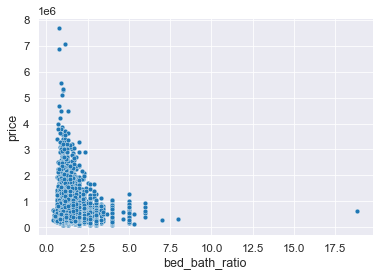

In [66]:
sns.scatterplot('bed_bath_ratio', 'price', data=df)

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

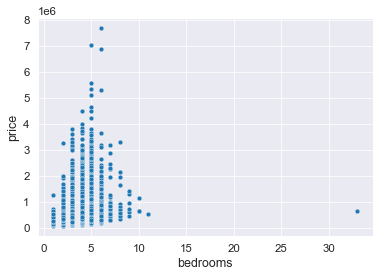

In [67]:
sns.scatterplot('bedrooms', 'price', data=df)

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

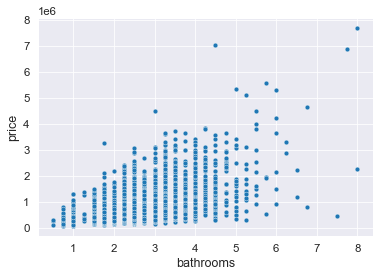

In [68]:
sns.scatterplot('bathrooms', 'price', data=df)

'bedrooms' and 'bed_bath_ratio' seem to have a common outlier, a house that is low priced with over thirty bedrooms. This may be an erroneous entry/ outlier.

## Explore Data

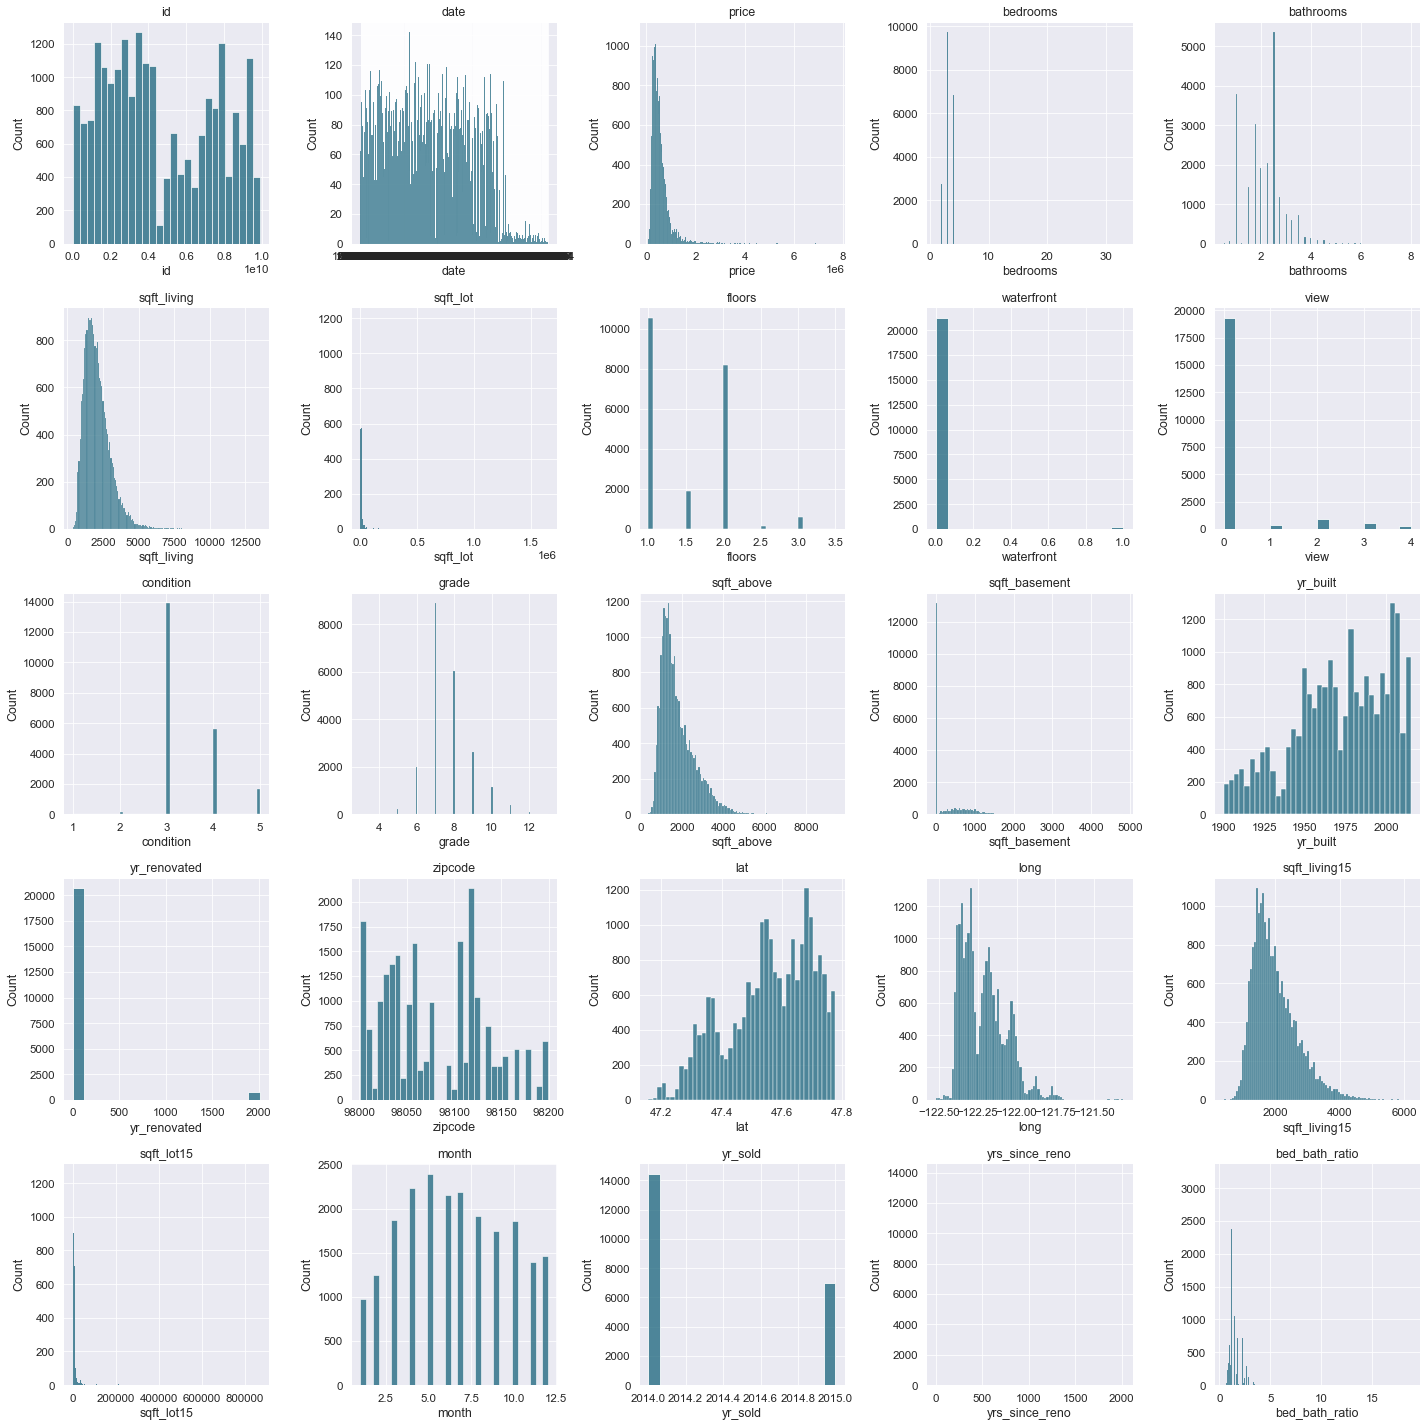

In [69]:
plt.figure(figsize=(20,20))

for index, col in enumerate(df.columns):
    ax = plt.subplot(5, 5, index+1)
    sns.histplot(x=col, data=df, ax=ax, color='#18637b')
    ax.set_title('{}'.format(col))
plt.tight_layout()
plt.savefig('images/histograms-1.png')
plt.savefig('images/hr-histograms-1.png', dpi=200)

Distributions of many columns are skewed ('price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_living15', 'sqft_lot15'). This data will benefit from log transformations down the line after outliers are removed. It may also be beneficial to rescale the data.

In [70]:
df.drop(['id'], axis=1, inplace=True)

In [71]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month', 'yr_sold', 'yrs_since_reno',
       'bed_bath_ratio'],
      dtype='object')

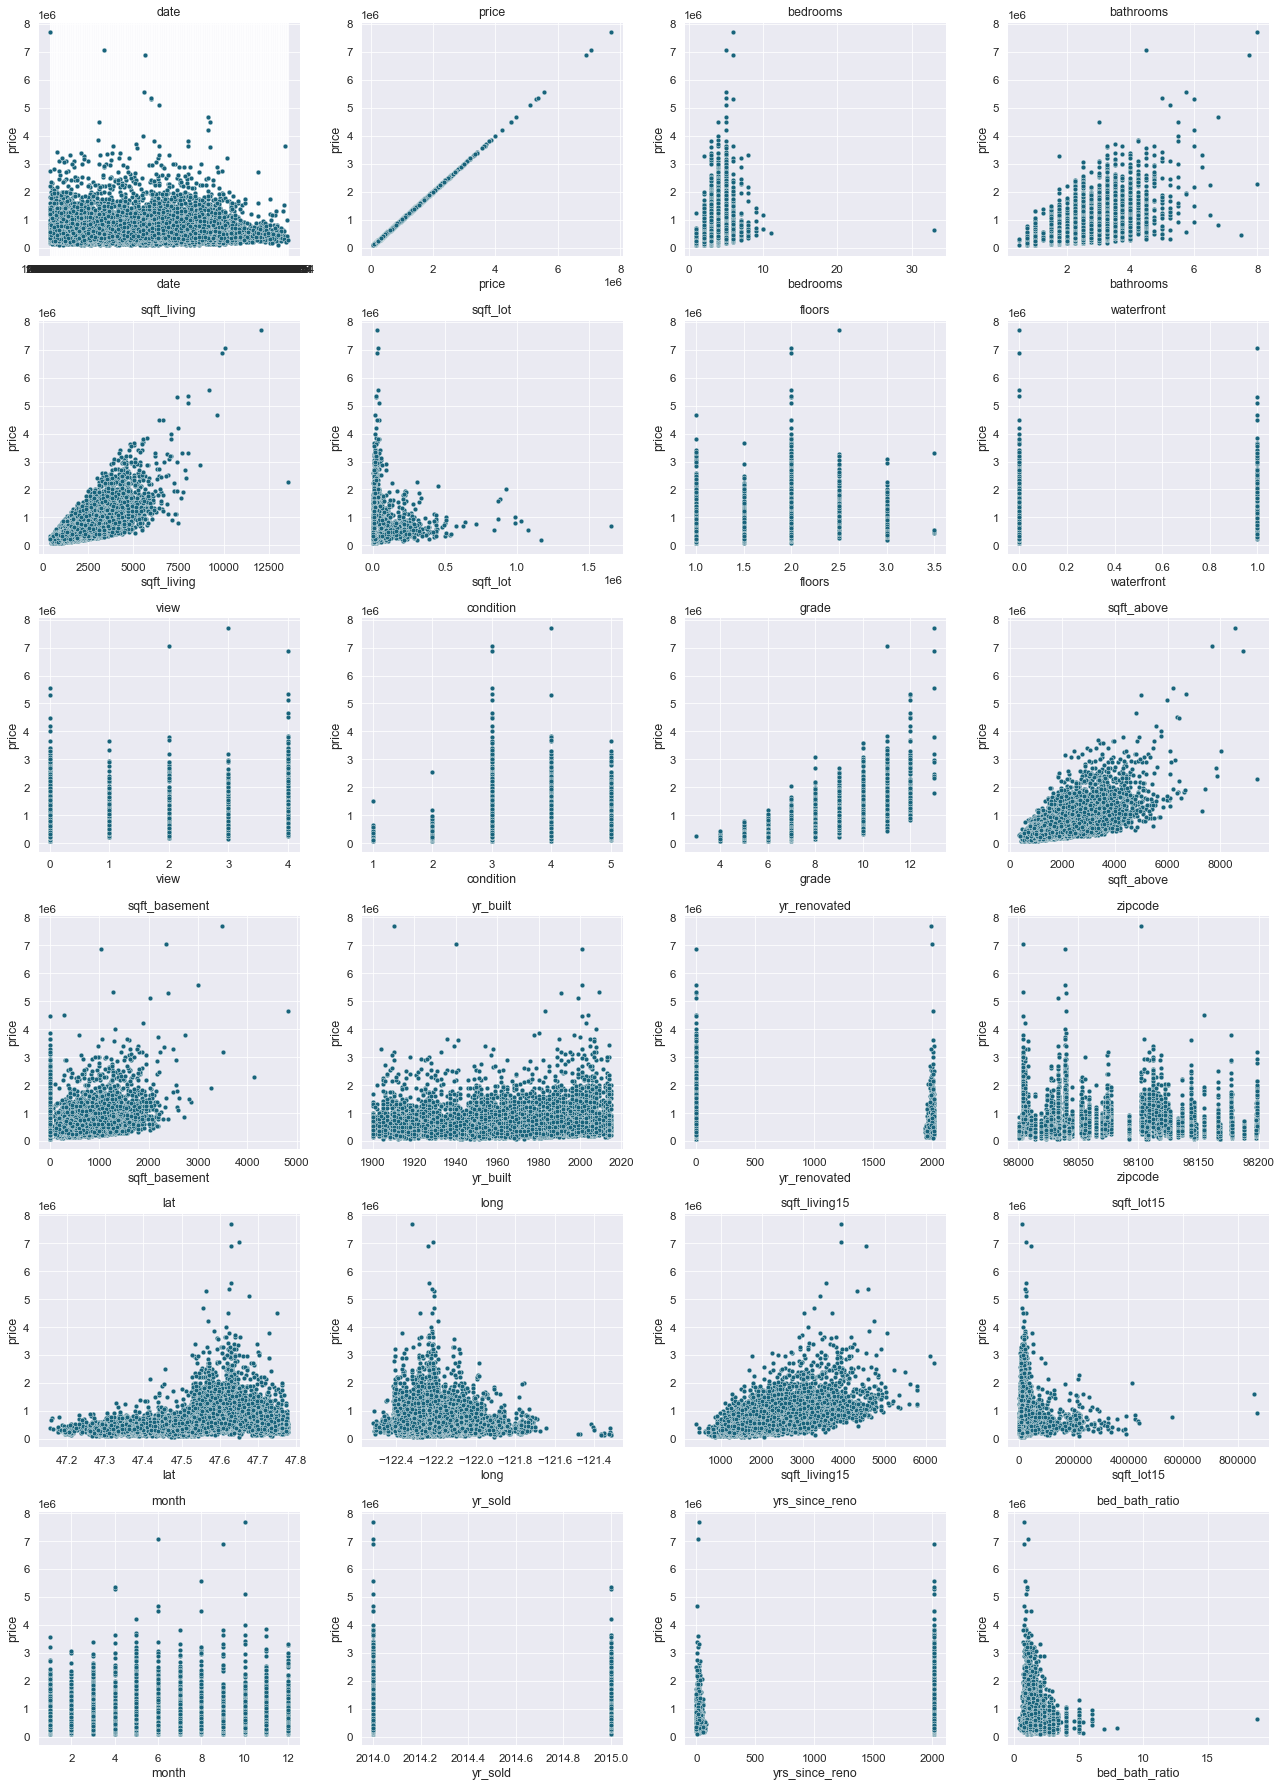

In [72]:
plt.figure(figsize=(18,25))

for index, col in enumerate(df.columns):
    ax = plt.subplot(6, 4, index+1)
    sns.scatterplot(x=col, y='price', data=df, ax=ax, color='#18637b')
    ax.set_title('{}'.format(col))
plt.tight_layout()
plt.savefig('images/scatterplots-1.png')
plt.savefig('images/hr-scatterplots-1.png', dpi=200)

At first glance, 'bathrooms', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15', grade seem to have the most linear relationships with price. There are some outliers in many predictors.  
- `bedrooms`: a low pricced property with over 30 bedrooms. I've assumed this was likely a mistake entry.
- `bathrooms`: high and low priced properties with over 5 bathrooms
- `price`: outliers beyond 6M
- outliers in sqft data
Some scatter plots have higher pricing in the middle of the plots, where there may be a positive correlation up to a certain value of the predictor variable, followed by a negative correlation. This would mean that the most optimal values for that feature are somewhere in the middle. Features showing this pattern may need to be split into more categories/subfeatures. `bedrooms` is the most obvious example of this

### Multicolinearity

In [73]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,yr_sold,yrs_since_reno,bed_bath_ratio
price,1.000000,0.309640,0.525215,0.701295,0.088789,0.254972,0.244254,0.392787,0.034219,0.666835,...,0.118278,-0.051169,0.306439,0.019826,0.583792,0.082045,-0.007920,0.001385,-0.118274,-0.248366
bedrooms,0.309640,1.000000,0.515383,0.579069,0.032490,0.177734,-0.006762,0.078353,0.025893,0.357988,...,0.017470,-0.155061,-0.011266,0.132439,0.394949,0.030570,-0.000853,-0.010479,-0.017483,0.208307
bathrooms,0.525215,0.515383,1.000000,0.755522,0.087779,0.501803,0.056354,0.184949,-0.129362,0.665587,...,0.047686,-0.203884,0.023143,0.223808,0.569453,0.087760,0.009419,-0.028630,-0.047721,-0.653467
sqft_living,0.701295,0.579069,0.755522,1.000000,0.172586,0.352868,0.094080,0.280839,-0.061677,0.762477,...,0.050851,-0.198995,0.050739,0.240212,0.756186,0.183837,0.013848,-0.030793,-0.050890,-0.323680
sqft_lot,0.088789,0.032490,0.087779,0.172586,1.000000,-0.005561,0.021435,0.075360,-0.009169,0.113656,...,0.004991,-0.129422,-0.085822,0.230265,0.143805,0.717743,-0.002576,0.005305,-0.004984,-0.050038
floors,0.254972,0.177734,0.501803,0.352868,-0.005561,1.000000,0.016340,0.027175,-0.266859,0.458091,...,0.003141,-0.058532,0.048900,0.124812,0.279071,-0.011367,0.015776,-0.024178,-0.003172,-0.374296
waterfront,0.244254,-0.006762,0.056354,0.094080,0.021435,0.016340,1.000000,0.353796,0.013017,0.073902,...,0.069787,0.026801,-0.015502,-0.032630,0.076963,0.030857,0.007850,-0.004116,-0.069790,-0.043597
view,0.392787,0.078353,0.184949,0.280839,0.075360,0.027175,0.353796,1.000000,0.044678,0.247632,...,0.089982,0.087334,0.005835,-0.079019,0.277555,0.073381,-0.004046,0.000496,-0.089979,-0.106371
condition,0.034219,0.025893,-0.129362,-0.061677,-0.009169,-0.266859,0.013017,0.044678,1.000000,-0.150508,...,-0.056264,0.004372,-0.015566,-0.107154,-0.095256,-0.003450,0.023919,-0.047516,0.056201,0.135869
grade,0.666835,0.357988,0.665587,0.762477,0.113656,0.458091,0.073902,0.247632,-0.150508,1.000000,...,0.015744,-0.183588,0.112815,0.198555,0.713178,0.120056,0.011727,-0.033220,-0.015786,-0.402314


<AxesSubplot:>

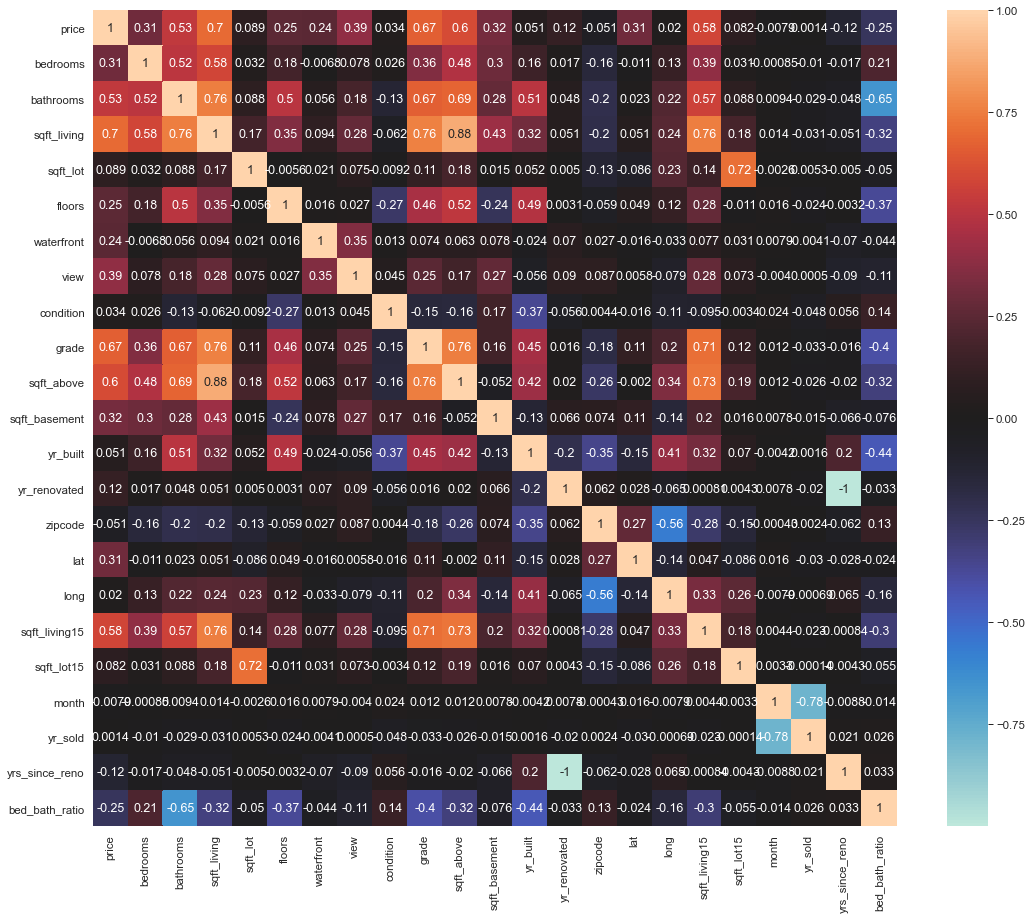

In [74]:
plt.figure(figsize=(18,15))
sns.heatmap(data = df.corr(), center= 0, annot= True)

Correlation with absolute value of 0.7-0.8 is considered high. 

Sqft_living has the highest correlation with price (0.7), followed by grade (0.6)

Correlations among features (0.75 cutoff value):
- sqft_above and sqft_living (0.88)
- sqft_living and grade (0.76) --> is sqft_living factor into the grade of a home?
- sqft_living15 and sqft_living (0.76)  --> space in comps has high-ish correlation with space of home in general
- sqft_living and bathrooms (0.76)
- yr_renovated and yrs_since_reno (-1)
- month and yr_sold (-0.78)

Let's drop the most highly correlated/less useful for now, but will play with dropping yr_renovated v. yrs_since_reno later.


In [75]:
df = df.drop(['sqft_above', 'yr_sold'], axis=1)

In [76]:
df.to_csv('data/data_cleaned.csv', index=False)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            21420 non-null  object 
 1   price           21420 non-null  float64
 2   bedrooms        21420 non-null  int64  
 3   bathrooms       21420 non-null  float64
 4   sqft_living     21420 non-null  int64  
 5   sqft_lot        21420 non-null  int64  
 6   floors          21420 non-null  float64
 7   waterfront      21420 non-null  float64
 8   view            21420 non-null  float64
 9   condition       21420 non-null  int64  
 10  grade           21420 non-null  int64  
 11  sqft_basement   21420 non-null  float64
 12  yr_built        21420 non-null  int64  
 13  yr_renovated    21420 non-null  int64  
 14  zipcode         21420 non-null  int64  
 15  lat             21420 non-null  float64
 16  long            21420 non-null  float64
 17  sqft_living15   21420 non-null 